In [2378]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


# #**Reading Data**

In [2379]:
df=pd.read_csv("/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Checking IF null values present in Data 

In [2380]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [2381]:
df=df.drop(['area_type','society','availability'],axis='columns')
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [2382]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [2383]:
df=df.fillna(0)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [2384]:
df.shape

(13320, 6)

In [2385]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [2386]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', 0, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [2387]:
df['size']=pd.to_numeric(df['size'],errors='ignore').astype('str')
df['Room_Count'] = df['size'].apply(lambda x: x.split(' ')[0])
df

,location,size,total_sqft,bath,balcony,price,Room_Count
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [2388]:
df=df.sort_values(by='Room_Count', ascending=True)


In [2389]:
df['Room_Count'].unique()

array(['0', '1', '10', '11', '12', '13', '14', '16', '18', '19', '2',
       '27', '3', '4', '43', '5', '6', '7', '8', '9'], dtype=object)

In [2390]:
df['Room_Count']

11019    0
11569    0
10634    0
2264     0
1775     0
        ..
2929     9
5847     9
8050     9
1400     9
10695    9
Name: Room_Count, Length: 13320, dtype: object

In [2391]:
df

,location,size,total_sqft,bath,balcony,price,Room_Count
11019,Yelahanka,0,1200 - 1800,0.0,0.0,12.75,0
11569,Hosur Road,0,1350,0.0,0.0,8.44,0
10634,Rajankunte,0,1575,0.0,0.0,31.11,0
2264,Banashankari,0,2400,0.0,0.0,460.00,0
1775,IVC Road,0,2000 - 5634,0.0,0.0,124.00,0
...,...,...,...,...,...,...,...
2929,Sunkadakatte,9 Bedroom,1500,6.0,1.0,80.00,9
5847,Vidyaranyapura,9 BHK,4700,10.0,3.0,130.00,9
8050,Raja Rajeshwari Nagar,9 Bedroom,3600,9.0,3.0,240.00,9
1400,Chamrajpet,9 BHK,716Sq. Meter,9.0,1.0,296.00,9


In [2392]:
df = df.copy()
df['location'] = df['location'].astype('str')
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

Whitefield               541
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
T R Mill Road              1
Prasanth Extension         1
Wheelers Road              1
Muthyala Nagar             1
Raja Rajashweri Nagar      1
Name: location, Length: 1295, dtype: int64

In [2393]:
df[df['location']=='Electronic City']

,location,size,total_sqft,bath,balcony,price,Room_Count
9477,Electronic City,1 BHK,630,1.0,1.0,40.50,1
9949,Electronic City,1 BHK,635,1.0,0.0,28.00,1
9642,Electronic City,1 BHK,605,1.0,1.0,22.00,1
8802,Electronic City,1 BHK,635,1.0,1.0,28.00,1
11332,Electronic City,1 BHK,1090,2.0,1.0,31.48,1
...,...,...,...,...,...,...,...
10570,Electronic City,4 Bedroom,1800,3.0,2.0,700.00,4
1325,Electronic City,4 Bedroom,2000,4.0,0.0,120.00,4
9959,Electronic City,4 Bedroom,1800,3.0,2.0,190.00,4
9686,Electronic City,5 Bedroom,717,5.0,1.0,78.00,5


In [2394]:
rem=location_stats[location_stats<=5]
rem

Mallathahalli            5
Shanthala Nagar          5
Amruthnagar              5
Govindpura               5
Stage-4 Bommanahalli     5
                        ..
T R Mill Road            1
Prasanth Extension       1
Wheelers Road            1
Muthyala Nagar           1
Raja Rajashweri Nagar    1
Name: location, Length: 910, dtype: int64

In [2395]:
df.location = df.location.apply(lambda x: 'other' if x in rem else x)
df.location.unique

<bound method Series.unique of 11019                Yelahanka
11569               Hosur Road
10634                    other
2264              Banashankari
1775                     other
                 ...          
2929                     other
5847            Vidyaranyapura
8050     Raja Rajeshwari Nagar
1400                Chamrajpet
10695          Electronic City
Name: location, Length: 13320, dtype: object>

In [2396]:
 df['location'].value_counts(ascending=False)

other                             1800
Whitefield                         541
Sarjapur  Road                     399
Electronic City                    304
Kanakpura Road                     273
                                  ... 
Suraksha Nagar                       6
Shree Ananth Nagar Layout            6
Doddanakundi Industrial Area 2       6
Amblipura                            6
Rustam Bagh Layout                   6
Name: location, Length: 386, dtype: int64

In [2397]:
loc=df['location'].unique()
z=[]
for i in loc:
    z.append(i)

In [2398]:
from sklearn import preprocessing
lable = preprocessing.LabelEncoder()
lable.fit(z)

LabelEncoder()

In [2399]:
z1=np.array(df['location'])
z11=[]
for i in z1:
    z11.append(i)
z11

['Yelahanka',
 'Hosur Road',
 'other',
 'Banashankari',
 'other',
 'Mysore Road',
 'Hoskote',
 'Kasavanhalli',
 'other',
 'Jigani',
 'Devanahalli',
 'Sarjapur  Road',
 'Sarjapur  Road',
 'Whitefield',
 'Devanahalli',
 'Anekal',
 'Balagere',
 'Kamakshipalya',
 'Ananth Nagar',
 'Yeshwanthpur',
 'Haralur Road',
 'other',
 '7th Phase JP Nagar',
 'Vajarahalli',
 'Anekal',
 'other',
 'Balagere',
 'Hormavu',
 'Electronic City',
 'Hoodi',
 'Balagere',
 'Domlur',
 'Ramamurthy Nagar',
 'Kaggalipura',
 'Attibele',
 'Anekal',
 'Mysore Road',
 'other',
 'Yelahanka',
 'Malleshwaram',
 'Balagere',
 'Sarjapur  Road',
 'Hulimavu',
 'Arekere',
 'Sarjapur  Road',
 'Doddathoguru',
 'Yeshwanthpur',
 'other',
 'Bommanahalli',
 'other',
 'other',
 'Kanakapura',
 'Thanisandra',
 'Attibele',
 'other',
 'Electronic City',
 'Ambalipura',
 'Yelahanka',
 'other',
 'Malleshwaram',
 'Whitefield',
 'other',
 'Ramagondanahalli',
 'Hoodi',
 'BTM Layout',
 'Electronic City',
 'other',
 'JP Nagar',
 'Thanisandra',
 'Sing

In [2400]:
k=lable.transform(z11)
df['location']=k

In [2401]:
df['total_sqft']=pd.to_numeric(df['total_sqft'],errors='ignore').astype('str')

In [2402]:
def change(x):
    t=x.split('-')
    if len(t)>1:
        return (float(t[0])+float(t[1]))/2
    try:
        return float(x)
    except:
        return None



In [2403]:
df['total_sqft']=df['total_sqft'].apply(change)
df['total_sqft']

11019    1500.0
11569    1350.0
10634    1575.0
2264     2400.0
1775     3817.0
          ...  
2929     1500.0
5847     4700.0
8050     3600.0
1400        NaN
10695    1200.0
Name: total_sqft, Length: 13320, dtype: float64

In [2404]:
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
Room_Count     0
dtype: int64

In [2405]:
df = df.copy()
df=df.dropna()

In [2406]:
df

,location,size,total_sqft,bath,balcony,price,Room_Count
11019,380,0,1500.0,0.0,0.0,12.75,0
11569,175,0,1350.0,0.0,0.0,8.44,0
10634,385,0,1575.0,0.0,0.0,31.11,0
2264,52,0,2400.0,0.0,0.0,460.00,0
1775,385,0,3817.0,0.0,0.0,124.00,0
...,...,...,...,...,...,...,...
11324,299,9 Bedroom,3600.0,8.0,2.0,165.00,9
2929,385,9 Bedroom,1500.0,6.0,1.0,80.00,9
5847,368,9 BHK,4700.0,10.0,3.0,130.00,9
8050,302,9 Bedroom,3600.0,9.0,3.0,240.00,9


# Extracting integers from strings in total sqft column

In [2407]:
df = df.copy()
df['Price_per_Sqft']=round((df['price']*100000)/df['total_sqft'],-2)

In [2408]:
df = df.copy()
df['bath']=df['bath'].astype('float64')
df['balcony']=df['balcony'].astype('float64')
df['Room_Count']=df['Room_Count'].astype('float64')
df

,location,size,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft
11019,380,0,1500.0,0.0,0.0,12.75,0.0,800.0
11569,175,0,1350.0,0.0,0.0,8.44,0.0,600.0
10634,385,0,1575.0,0.0,0.0,31.11,0.0,2000.0
2264,52,0,2400.0,0.0,0.0,460.00,0.0,19200.0
1775,385,0,3817.0,0.0,0.0,124.00,0.0,3200.0
...,...,...,...,...,...,...,...,...
11324,299,9 Bedroom,3600.0,8.0,2.0,165.00,9.0,4600.0
2929,385,9 Bedroom,1500.0,6.0,1.0,80.00,9.0,5300.0
5847,368,9 BHK,4700.0,10.0,3.0,130.00,9.0,2800.0
8050,302,9 Bedroom,3600.0,9.0,3.0,240.00,9.0,6700.0


In [2409]:
df

,location,size,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft
11019,380,0,1500.0,0.0,0.0,12.75,0.0,800.0
11569,175,0,1350.0,0.0,0.0,8.44,0.0,600.0
10634,385,0,1575.0,0.0,0.0,31.11,0.0,2000.0
2264,52,0,2400.0,0.0,0.0,460.00,0.0,19200.0
1775,385,0,3817.0,0.0,0.0,124.00,0.0,3200.0
...,...,...,...,...,...,...,...,...
11324,299,9 Bedroom,3600.0,8.0,2.0,165.00,9.0,4600.0
2929,385,9 Bedroom,1500.0,6.0,1.0,80.00,9.0,5300.0
5847,368,9 BHK,4700.0,10.0,3.0,130.00,9.0,2800.0
8050,302,9 Bedroom,3600.0,9.0,3.0,240.00,9.0,6700.0


In [2410]:
df=df[df['Room_Count'] > 0.0] 

In [2411]:
df = df.copy()
df

,location,size,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft
9363,50,1 BHK,656.0,1.0,1.0,38.77,1.0,5900.0
9597,206,1 Bedroom,450.0,1.0,0.0,30.00,1.0,6700.0
2001,32,1 BHK,500.0,2.0,2.0,14.00,1.0,2800.0
9575,384,1 BHK,994.0,2.0,0.0,54.67,1.0,5500.0
9560,156,1 BHK,560.0,1.0,1.0,45.00,1.0,8000.0
...,...,...,...,...,...,...,...,...
11324,299,9 Bedroom,3600.0,8.0,2.0,165.00,9.0,4600.0
2929,385,9 Bedroom,1500.0,6.0,1.0,80.00,9.0,5300.0
5847,368,9 BHK,4700.0,10.0,3.0,130.00,9.0,2800.0
8050,302,9 Bedroom,3600.0,9.0,3.0,240.00,9.0,6700.0


In [2412]:
df['extra_place'] = df['bath']+df['balcony']
df['extra_place']

9363      2.0
9597      1.0
2001      4.0
9575      2.0
9560      2.0
         ... 
11324    10.0
2929      7.0
5847     13.0
8050     12.0
10695    13.0
Name: extra_place, Length: 13258, dtype: float64

### Google says minimum room area is of 220 sqft and for bathroom and bath we assume 140sqft area is valid

In [2413]:
df = df.copy()
df=df[(df['total_sqft']/df['Room_Count']- 220)/df['extra_place'] > 140]

In [2414]:
df.describe()

,location,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft,extra_place
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000
mean,242.675273,2075.284573,2.025818,0.692484,169.773494,2.149168,7107.515777,2.718302
std,120.471286,2861.651225,1.198410,0.711224,283.185110,1.072358,4259.977923,1.479808
min,0.000000,375.000000,0.000000,0.000000,11.500000,1.000000,300.000000,0.000000
25%,141.000000,812.000000,1.000000,0.000000,45.000000,1.000000,4600.000000,2.000000
50%,255.000000,1330.000000,2.000000,1.000000,75.970000,2.000000,5900.000000,2.000000
75%,377.000000,2400.000000,2.000000,1.000000,175.000000,3.000000,8000.000000,3.000000
max,385.000000,52272.000000,9.000000,3.000000,2912.000000,9.000000,35000.000000,11.000000


### There should be less no. of bathroom compare to no. of rooms
so **to check we assume bathrooms are more than rooms**

Text(0, 0.5, 'Count')

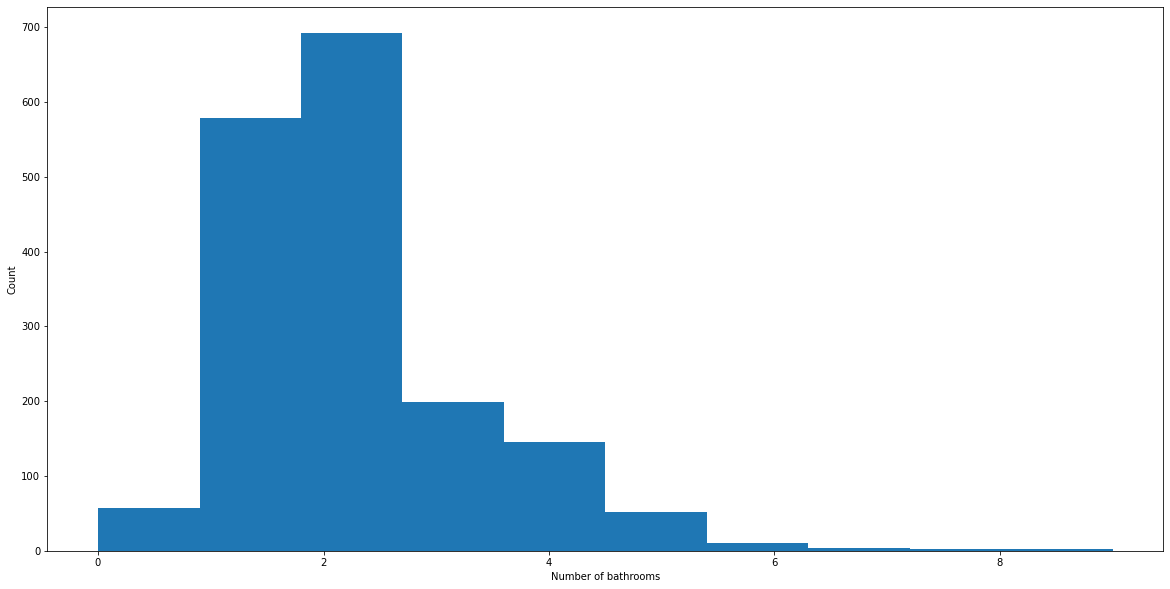

In [2415]:
# Ploting the histogram for Number of bathrooms vs Count
plt.hist(df.bath,rwidth=1)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [2416]:
df[df.bath>df.Room_Count+2]

,location,size,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft,extra_place
11366,276,4 Bedroom,7000.0,8.0,0.0,450.0,4.0,6400.0,8.0
2620,324,6 BHK,11338.0,9.0,1.0,1000.0,6.0,8800.0,10.0


# ****taking only valid entries****
### by using condition= which states there should be less no. of bathroom compare to (no.of rooms + 2) 
 

In [2417]:
df = df.copy()
df=df[df.bath<df.Room_Count+1]
df

,location,size,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft,extra_place
9363,50,1 BHK,656.0,1.0,1.0,38.77,1.0,5900.0,2.0
9597,206,1 Bedroom,450.0,1.0,0.0,30.00,1.0,6700.0,1.0
9560,156,1 BHK,560.0,1.0,1.0,45.00,1.0,8000.0,2.0
9544,385,1 BHK,550.0,1.0,1.0,16.00,1.0,2900.0,2.0
9536,14,1 Bedroom,500.0,1.0,0.0,70.00,1.0,14000.0,1.0
...,...,...,...,...,...,...,...,...,...
2368,75,5 Bedroom,6040.0,4.0,0.0,170.00,5.0,2800.0,4.0
12987,127,6 Bedroom,30400.0,4.0,2.0,1824.00,6.0,6000.0,6.0
605,255,7 BHK,12000.0,7.0,3.0,2200.00,7.0,18300.0,10.0
408,303,7 BHK,12000.0,6.0,3.0,2200.00,7.0,18300.0,9.0


 **checking with balcony**

In [2418]:
df[df.balcony>df.Room_Count+1]

,location,size,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft,extra_place


**Above condition is also rare so ignoring that also**

Text(0, 0.5, 'Count')

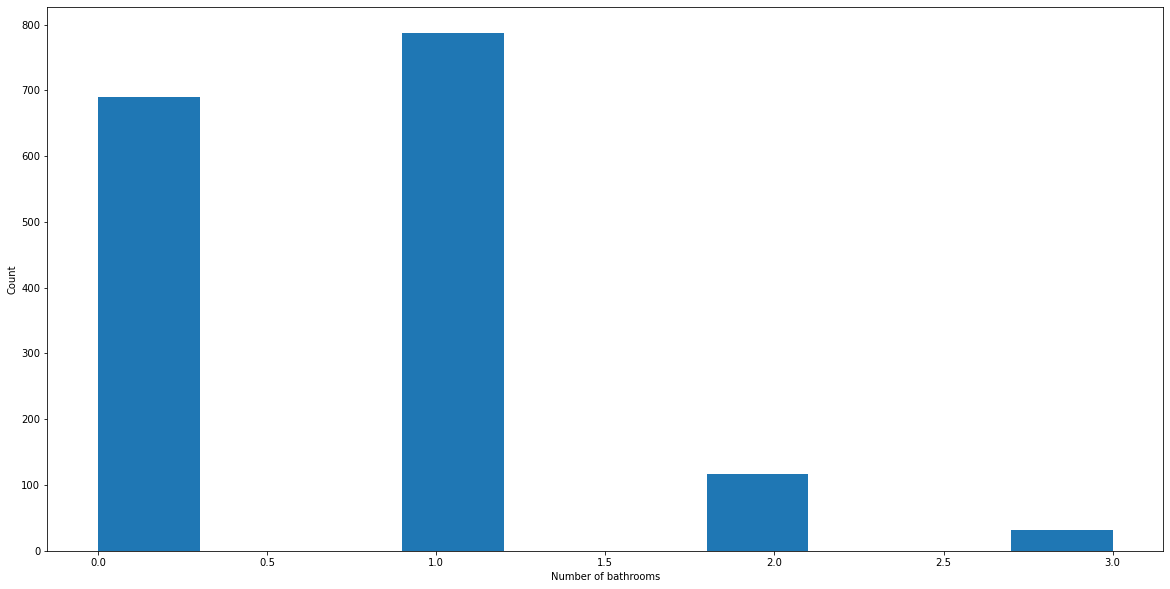

In [2419]:
# Ploting the histogram for Number of bathrooms vs Count
plt.hist(df.balcony,rwidth=1)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [2420]:
df = df.copy()
df=df[df.balcony<df.Room_Count+1]
df

,location,size,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft,extra_place
9363,50,1 BHK,656.0,1.0,1.0,38.77,1.0,5900.0,2.0
9597,206,1 Bedroom,450.0,1.0,0.0,30.00,1.0,6700.0,1.0
9560,156,1 BHK,560.0,1.0,1.0,45.00,1.0,8000.0,2.0
9544,385,1 BHK,550.0,1.0,1.0,16.00,1.0,2900.0,2.0
9536,14,1 Bedroom,500.0,1.0,0.0,70.00,1.0,14000.0,1.0
...,...,...,...,...,...,...,...,...,...
2368,75,5 Bedroom,6040.0,4.0,0.0,170.00,5.0,2800.0,4.0
12987,127,6 Bedroom,30400.0,4.0,2.0,1824.00,6.0,6000.0,6.0
605,255,7 BHK,12000.0,7.0,3.0,2200.00,7.0,18300.0,10.0
408,303,7 BHK,12000.0,6.0,3.0,2200.00,7.0,18300.0,9.0


In [2421]:
df=df.copy()
df=df.drop(['size','extra_place'],axis='columns')
df.head()

,location,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft
9363,50,656.0,1.0,1.0,38.77,1.0,5900.0
9597,206,450.0,1.0,0.0,30.00,1.0,6700.0
9560,156,560.0,1.0,1.0,45.00,1.0,8000.0
9544,385,550.0,1.0,1.0,16.00,1.0,2900.0
9536,14,500.0,1.0,0.0,70.00,1.0,14000.0


In [2422]:
df.describe()

,location,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000
mean,241.458750,1940.154069,1.876250,0.664375,146.165006,2.097500,6898.81250
std,120.149858,2844.583194,0.995141,0.672319,229.953762,1.020978,3952.31487
min,0.000000,375.000000,0.000000,0.000000,11.500000,1.000000,300.00000
25%,139.500000,800.000000,1.000000,0.000000,43.762500,1.000000,4600.00000
50%,250.000000,1320.000000,2.000000,1.000000,75.000000,2.000000,5800.00000
75%,377.000000,2155.500000,2.000000,1.000000,150.000000,3.000000,7800.00000
max,385.000000,52272.000000,8.000000,3.000000,2700.000000,9.000000,34100.00000


In [2423]:
df.head()

,location,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft
9363,50,656.0,1.0,1.0,38.77,1.0,5900.0
9597,206,450.0,1.0,0.0,30.00,1.0,6700.0
9560,156,560.0,1.0,1.0,45.00,1.0,8000.0
9544,385,550.0,1.0,1.0,16.00,1.0,2900.0
9536,14,500.0,1.0,0.0,70.00,1.0,14000.0


In [2424]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_per_Sqft)
        st = np.std(subdf.Price_per_Sqft)
        reduced_df = subdf[(subdf.Price_per_Sqft>(m-st)) & (subdf.Price_per_Sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(1048, 7)

In [2425]:
df.describe()

,location,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,252.265267,1612.045592,1.784351,0.648855,114.983888,1.999046,6388.549618
std,119.642520,1750.309002,0.909077,0.617153,165.238280,0.932794,2791.223555
min,3.000000,375.000000,0.000000,0.000000,13.570000,1.000000,2300.000000
25%,157.750000,750.000000,1.000000,0.000000,42.067500,1.000000,4800.000000
50%,264.000000,1300.000000,2.000000,1.000000,70.000000,2.000000,5700.000000
75%,377.000000,1565.550000,2.000000,1.000000,110.000000,2.000000,7100.000000
max,385.000000,30400.000000,6.000000,3.000000,2200.000000,7.000000,20800.000000


In [2426]:
df.head()

,location,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft
0,3,1394.0,2.0,1.0,100.0,2.0,7200.0
1,3,1200.0,2.0,0.0,86.0,2.0,7200.0
2,3,2024.0,3.0,0.0,157.0,3.0,7800.0
3,12,552.0,1.0,1.0,23.5,1.0,4300.0
4,13,1460.0,2.0,0.0,80.0,2.0,5500.0


In [2427]:
df=df.sort_values(by='location', ascending=True)
df

,location,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft
0,3,1394.0,2.0,1.0,100.0,2.0,7200.0
1,3,1200.0,2.0,0.0,86.0,2.0,7200.0
2,3,2024.0,3.0,0.0,157.0,3.0,7800.0
3,12,552.0,1.0,1.0,23.5,1.0,4300.0
4,13,1460.0,2.0,0.0,80.0,2.0,5500.0
...,...,...,...,...,...,...,...
916,385,1530.0,2.0,1.0,185.0,2.0,12100.0
917,385,1225.0,2.0,0.0,65.0,2.0,5300.0
918,385,1340.0,2.0,1.0,65.0,2.0,4900.0
908,385,530.0,1.0,1.0,18.0,1.0,3400.0


In [2428]:
b=df["location"].unique()

In [2429]:
value=df.groupby("location")["Price_per_Sqft"].agg("mean")
value

location
3       7400.000000
12      4300.000000
13      7666.666667
14      5400.000000
15      4725.000000
           ...     
380     5137.931034
381     5550.000000
383    19500.000000
384     5873.333333
385     6010.396040
Name: Price_per_Sqft, Length: 179, dtype: float64

Text(0.5, 1.0, 'location wise value')

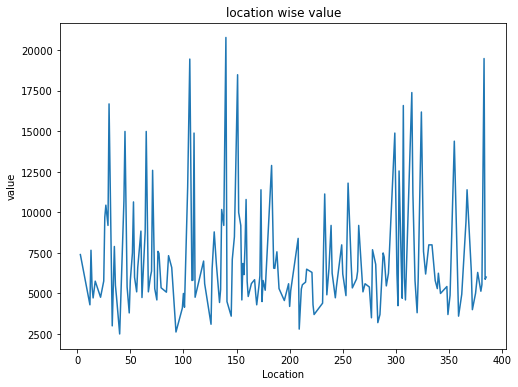

In [2430]:
matplotlib.rcParams['figure.figsize'] = (8,6)
plt.plot(b,value)
plt.xlabel("Location")
plt.ylabel("value")
plt.title("location wise value")

In [2431]:
place=df.location.unique()
lable.inverse_transform(place)

array(['1st Phase JP Nagar', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'Akshaya Nagar', 'Ambalipura', 'Ambedkar Colony', 'Ambedkar Nagar',
       'Amruthahalli', 'Anand Nagar', 'Anekal', 'Ardendale', 'Arekere',
       'Ashirvad Colony', 'Attibele', 'BTM 1st Stage', 'BTM 2nd Stage',
       'Babusapalaya', 'Bagalakunte', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage VI', 'Banaswadi', 'Bannerghatta',
       'Bannerghatta Road', 'Basavangudi', 'Basaveshwara Nagar',
       'Battarahalli', 'Begur Road', 'Bellandur', 'Benson Town',
       'Bhoganhalli', 'Bileshivale', 'Billekahalli', 'Binny Pete',
       'Bommanahalli', 'Budigere', 'Byatarayanapura', 'CV Raman Nagar',
       'Chandapura', 'Chikka Tirupathi', 'Chikkabanavar',
       'Chikkalasandra', 'Cooke Town', 'Cunningham Road', 'Dasanapura',
       'Dasarahalli', 'Defence Colony', 'Devanahall

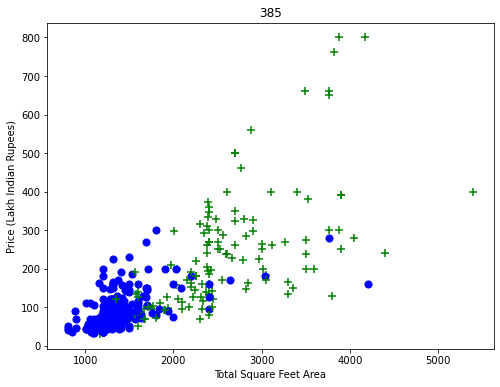

In [2432]:
# Ploting the Scatter Chart for 2 BHK and 3 BHK properties
def plot_scatter_chart(df,location):    
    bhk2 = df[(df.location==location) & (df.Room_Count==2)]
    bhk3 = df[(df.location==location) & (df.Room_Count==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    
    
for i in place:
    plot_scatter_chart(df,i)

# Model Building

In [2433]:
df

,location,total_sqft,bath,balcony,price,Room_Count,Price_per_Sqft
0,3,1394.0,2.0,1.0,100.0,2.0,7200.0
1,3,1200.0,2.0,0.0,86.0,2.0,7200.0
2,3,2024.0,3.0,0.0,157.0,3.0,7800.0
3,12,552.0,1.0,1.0,23.5,1.0,4300.0
4,13,1460.0,2.0,0.0,80.0,2.0,5500.0
...,...,...,...,...,...,...,...
916,385,1530.0,2.0,1.0,185.0,2.0,12100.0
917,385,1225.0,2.0,0.0,65.0,2.0,5300.0
918,385,1340.0,2.0,1.0,65.0,2.0,4900.0
908,385,530.0,1.0,1.0,18.0,1.0,3400.0


# **Features**

In [2434]:
Target= df.price
Target

0       100.0
1        86.0
2       157.0
3        23.5
4        80.0
        ...  
916     185.0
917      65.0
918      65.0
908      18.0
1047    550.0
Name: price, Length: 1048, dtype: float64

In [2435]:
df=df.drop(['price','Price_per_Sqft'],axis='columns')
df

,location,total_sqft,bath,balcony,Room_Count
0,3,1394.0,2.0,1.0,2.0
1,3,1200.0,2.0,0.0,2.0
2,3,2024.0,3.0,0.0,3.0
3,12,552.0,1.0,1.0,1.0
4,13,1460.0,2.0,0.0,2.0
...,...,...,...,...,...
916,385,1530.0,2.0,1.0,2.0
917,385,1225.0,2.0,0.0,2.0
918,385,1340.0,2.0,1.0,2.0
908,385,530.0,1.0,1.0,1.0


# Using Library

In [2436]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from numpy.linalg import inv,det,multi_dot,norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [2447]:
X_train, X_test, y_train, y_test = train_test_split(df,Target,test_size=0.3,random_state=32)
lr_clf = linear_model.LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)



0.85976723507511

In [2446]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=32)
cross_val_score(LinearRegression(),df,Target, cv=cv)

array([0.85976724, 0.62896554, 0.6954844 , 0.62037761, 0.62177007])

# **Using My Model**

# **Linear regression** 

In [2439]:
class Linear:  
    def __init__(self):
        self.x=None
        self.y=None        
        self.weights = None
        self.bias = None
        self.cost= [ ]  
        
    def Linear_Train(self,x,y):
                                   # Direct Method
        r,c=x.shape
        x=np.array(x)
        y=np.array(y).reshape(r,1)
        w=np.zeros((c,1))
        z = np.ones(r).reshape(r,1)        
        x=np.hstack((z,x))
        Xtrans=np.transpose(x)                       
        a=np.dot(inv(np.dot(Xtrans,x)),Xtrans)
        W=np.dot(a, y)          
        self.weights=W[1:]
        self.bias=W[0]
        return W       
        
    def Linear_Test(self,x,y):
        r,c=x.shape
        x=np.array(x)
        y=np.array(y).reshape(r,1)        
        z= np.dot(x, self.weights) + self.bias            
        MSE=(1/len(x))* np.sum(np.square(z - y))            
        return MSE
      
        
    
    def predict_Score(self,x,y_true):
        z= np.dot(x, self.weights) + self.bias
        s= r2_score(y_true, z)   
        return s
        
        
    

In [2440]:
     
    def test_model_xy(x,y):
        r,c=x.shape           
        y =np.array(y).reshape(r,1)
        s1=[]
        mse=[]
        w=[]
        for i in range(10):
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)            
            model=Linear()             
            w.append(model.Linear_Train(X_train,y_train))
            mse.append(model.Linear_Test(X_test,y_test))
            s1.append(model.predict_Score(X_test,y_test))
            
        l=np.argmax(s1)
        
            
        print(" ")
        print('Parameters for hyperplane are-->')
        print(w[l])
        print(" ")   
        print('Score is-->{}'.format(s1[l]))
        print("")        
        print('Mean Square Error is-->{}'.format(mse[l]))
        

In [2441]:
test_model_xy(df,Target)

 
Parameters for hyperplane are-->
[[-6.89633723e+01]
 [-4.00309773e-03]
 [ 7.11333434e-02]
 [ 1.58462334e+01]
 [ 1.68873131e+01]
 [ 1.73804934e+01]]
 
Score is-->0.8198117990216109

Mean Square Error is-->4429.398985304967
